## Mimicking Agent 1 With Dense NN

### Imports and Settings

In [1]:
import pickle
import warnings

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import tensorflow as tf

from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
warnings.filterwarnings('ignore')

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
    
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Hyperparameters

NUM_COLS = 50

# Change the base path as per location of the files in your drive

BASE_PATH = "/content/gdrive/MyDrive/CS520/Centered_data/"
KNOWLEDGE_SNAPS_PATH = BASE_PATH+"knowledge_snaps_ag1_10k.csv"
MOVEMENT_SNAPS_PATH = BASE_PATH+"movement_snaps_ag1_10k.csv"
POSITION_SNAPS_PATH = BASE_PATH+"position_snaps_ag1_10k.csv"
SAVE_DIR = ""

### Load Data

In [4]:
%%time

movement_snaps = pd.read_csv(MOVEMENT_SNAPS_PATH)
position_snaps = pd.read_csv(POSITION_SNAPS_PATH).astype(int)
knowledge_snaps = pd.read_csv(KNOWLEDGE_SNAPS_PATH)

FileNotFoundError: ignored

In [ ]:
knowledge_snaps.shape, movement_snaps.shape, position_snaps.shape

((1767759, 2), (1767759, 5), (1767759, 4))

In [ ]:
# One-hot labels in pre-decided order

if "Unnamed: 0" in movement_snaps.columns:
    movement_snaps.drop("Unnamed: 0", axis=1, inplace=True)
if "Unnamed: 0" in position_snaps.columns:
    position_snaps.drop("Unnamed: 0", axis=1, inplace=True)
if "Unnamed: 0" in knowledge_snaps.columns:
    knowledge_snaps.drop("Unnamed: 0", axis=1, inplace=True)
    
y = movement_snaps[["U", "D", "L", "R"]].astype(float).values
position_snaps.columns=['run_number','x_coord', 'y_coord']

NameError: ignored

In [ ]:
y.shape

(1767759, 4)

In [ ]:
pos_groups = position_snaps.groupby('run_number')
first_indices = [0]
for key, group in pos_groups:  
  first_indices.append(first_indices[-1]+len(group))

del first_indices[-1]
print(first_indices)
  # print(key, " : ", len(group)," : ", del_indices[-1]," : ",np.sum(np.reshape(np.array(list(knowledge_snaps.loc[del_indices[-1]][0])),(25,25)).astype(int)))

[0, 146, 344, 482, 676, 800, 977, 1153, 1301, 1455, 1677, 1821, 1995, 2165, 2406, 2586, 2768, 2928, 3134, 3276, 3424, 3682, 3864, 4016, 4172, 4330, 4478, 4602, 4740, 4938, 5060, 5228, 5494, 5634, 5794, 6018, 6168, 6318, 6534, 6720, 6880, 6997, 7125, 7339, 7489, 7825, 7989, 8169, 8335, 8487, 8601, 8765, 8947, 9113, 9251, 9429, 9637, 9809, 9999, 10195, 10357, 10547, 10685, 10989, 11137, 11281, 11445, 11565, 11761, 11917, 12121, 12247, 12419, 12571, 12737, 12843, 13087, 13245, 13409, 13565, 13713, 13875, 14051, 14205, 14357, 14487, 14715, 14961, 15109, 15257, 15411, 15601, 15743, 15959, 16139, 16327, 16471, 16587, 16755, 16909, 17101, 17265, 17489, 17653, 17807, 17965, 18247, 18475, 18615, 18765, 18909, 19069, 19217, 19369, 19561, 19709, 19865, 20005, 20155, 20295, 20507, 20594, 20752, 20939, 21052, 21342, 21492, 21642, 21792, 22002, 22230, 22386, 22520, 22666, 22804, 22960, 23092, 23298, 23598, 23756, 23902, 24122, 24302, 24452, 24594, 24796, 24952, 25182, 25360, 25542, 25734, 25942, 261

In [ ]:
first_snap = np.ones((25,25), dtype=int)
for i in range(25):
  for j in range(25):
    if i>=12 and j>=12:
      first_snap[i][j]=0

first_snap = np.reshape(first_snap,-1)

In [ ]:
for index in first_indices:
  knowledge_snaps.loc[index][0] = ''.join(first_snap.astype(str))

In [ ]:
## Get equal number of U,D,L,R samples
def get_normalized_samples(knowledge_snaps, position_snaps, movement_snaps):
    movement_counts = [0,0,0,0] # U,D,L,R
    final_knowledge_snaps, final_position_snaps, final_movement_snaps = [],[],[]
    
    lowest_count_direction = movement_snaps.sum()["U"]
    for i in tqdm(range(len(knowledge_snaps))):
        movement_index = list(movement_snaps.loc[i,:]).index(1)
        if(movement_counts[movement_index] < lowest_count_direction):
            movement_counts[movement_index] += 1
            final_knowledge_snaps.append(knowledge_snaps.loc[i][0])
            final_position_snaps.append(position_snaps.loc[i])
            final_movement_snaps.append(list(movement_snaps.loc[i,:]))
    return np.array(final_knowledge_snaps), pd.DataFrame(final_position_snaps, columns=['run_number','x_coord', 'y_coord']), pd.DataFrame(final_movement_snaps, columns=["U", "D", "L", "R"])

In [ ]:
def normalize(x):
  try:
    y = np.reshape(np.array(list(str(x))), (25, 25)).astype(int)
  except TypeError:
    print(type(x))
    print(x)

  return y

In [ ]:
X, position_snaps, movement_snaps = get_normalized_samples(knowledge_snaps, position_snaps, movement_snaps)

100%|██████████| 1767759/1767759 [11:54<00:00, 2475.13it/s]


In [ ]:
pd.DataFrame(X).to_csv("/content/gdrive/MyDrive/CS520/Centered_data/knowledge_fin.csv")

In [ ]:
# np.savetxt("/content/gdrive/MyDrive/CS520/Centered_data/knowledge_fin.csv",X , delimiter=",")
position_snaps.to_csv("/content/gdrive/MyDrive/CS520/Centered_data/position_snaps_fin.csv")
movement_snaps.to_csv("/content/gdrive/MyDrive/CS520/Centered_data/movement_snaps_fin.csv")

In [ ]:
X = pd.read_csv("/content/gdrive/MyDrive/CS520/Centered_data/knowledge_fin.csv")
y = pd.read_csv("/content/gdrive/MyDrive/CS520/Centered_data/movement_snaps_fin.csv")
X.shape, y.shape

((484348, 2), (484348, 5))

In [ ]:
position_snaps = pd.read_csv("/content/gdrive/MyDrive/CS520/Centered_data/position_snaps_fin.csv")

In [ ]:
if "Unnamed: 0" in y.columns:
    y.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
y

,U,D,L,R
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
484343,0,0,0,1
484344,0,0,0,1
484345,0,0,0,1
484346,0,0,0,1


In [ ]:
count = 0
for i in range(len(position_snaps)):
  if(position_snaps.loc[i,'x_coord'] == 48 and position_snaps.loc[i,'y_coord'] == 49 and y.loc[i,'D']!= 1) or 
    (position_snaps.loc[i,'x_coord'] == 49 and position_snaps.loc[i,'y_coord'] == 48 and y.loc[i,'R']!= 1):
    count += 1
count

1796

In [ ]:
X_new = np.array(X.drop(['Unnamed: 0'], axis=1).rename({'0': 'knowledge'}, axis=1)['knowledge'].apply(lambda x: np.array(list(str(x)))).values)

In [ ]:
X_new = [a.astype(int) for a in X_new]

In [ ]:
type(X_new), len(X_new), type(X_new[0])

(list, 484348, numpy.ndarray)

In [ ]:
X = np.array(X_new)
del X_new

In [ ]:
X.shape

(484348, 625)

In [ ]:
def get_position_vector(num_cols, position_snaps, idx, model_type="dense"):
    """ 
    Gets the position vector for 1 sample.
    1D for DNN and 2D for ConvNet

    Parameters
    ----------
    num_cols: int
        Dimension of the grid. E.g. '50' for 50x50 grid
    position_snaps: pd.DataFrame
        Should have columns 'x_coord' and 'y_coord'
    idx: int
        Index for which to generate position vector
    
    Returns
    -------
    position_vector: np.array
        1D aray for dense and 2D array for Conv
    """
    
    if model_type not in ("dense", "conv"):
        raise ValueError("model_type =", model_type, "not acceptable")
    
    # Initialize position for 2D array of zeros
    position_vector = np.zeros((num_cols, num_cols))

    # Change position to 1 were the agent is
    pos_x, pos_y = position_snaps[['x_coord', 'y_coord']].iloc[idx].values
    position_vector[pos_x][pos_y] = 1.

    # If model type is dense then reshape to 1D array
    if model_type == "dense":
        position_vector = np.reshape(position_vector, -1)

    return position_vector

In [ ]:
# Ckpt 1

with open('../data/agent_1_ckpt_1.pkl', 'wb') as f:
    pickle.dump((X, y), f)

In [ ]:
with open('../data/agent_1_ckpt_1.pkl', 'rb') as f:
    X, y = pickle.load(f)
    
X.shape, y.shape

((180604, 2500), (180604, 4))

In [ ]:
# Get position vectors for all samples
position_vectors = \
    np.array([get_position_vector(NUM_COLS, position_snaps, i) for i in range(position_snaps.shape[0])])

# Concatenate knowledge with position vectors to create samples
X = np.concatenate([X, position_vectors], axis=1)

X.shape

(180604, 5000)

In [ ]:
if "Unnamed: 0" in y.columns:
    y.drop("Unnamed: 0", axis=1, inplace=True)
y = y[['U', 'D', 'L', 'R']].values
y.shape

(484348, 4)

In [ ]:
X.shape, y.shape

((484348, 625), (484348, 4))

In [ ]:
assert X.shape[0] == y.shape[0], "No. of samples in X and y don't match!"

In [ ]:
position_snaps = pd.read_csv("/content/gdrive/MyDrive/CS520/Centered_data/position_snaps_fin.csv")

In [ ]:
# Ckpt 2

with open('../data/agent_1_ckpt_2.pkl', 'wb') as f:
    pickle.dump({'X': X, 'y': y, 'position_snaps': position_snaps}, f)

In [ ]:
with open('../data/agent_1_ckpt_2.pkl', 'rb') as f:
    data = pickle.load(f)
    X = data['X']
    y = data['y']
    
    
X.shape, y.shape

### Train-Test Split

In [ ]:
# For selecting train, test indices

run_index = position_snaps["run_number"].astype(int).values

In [ ]:
max(run_index)

9999

In [ ]:
# Select train and test indices by grid number

train_indices = np.where(run_index < 9500)[0]
test_indices = np.where(run_index >= 9500)[0]

In [ ]:
assert not set(train_indices).intersection(set(test_indices)), "Train and test indices are not exclusive!"

In [ ]:
# Separate train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42,shuffle=True, stratify=y)

In [ ]:
del X_train, y_train, X_test, y_test

In [ ]:
# Necessary to avoid kernel crash

del X, y

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((435913, 625), (435913, 4), (48435, 625), (48435, 4))

In [ ]:
y

In [ ]:
# Ckpt 3

with open('/content/gdrive/MyDrive/CS520/Centered_data/agent_1_ckpt_3.pkl', 'wb') as f:
    pickle.dump({'X_train': X_train, 
                 'y_train': y_train, 
                 'X_test': X_test, 
                 'y_test': y_test}, 
                f)

In [ ]:
def build_model(input_dim):
    """
    Builds DNN with input dimension as input_dim

    Parameters
    ----------
    input_dim: int
        Size of each training sample. For 50x50 grid, it is 2500
    """

    model =  tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(input_dim, activation="relu"))
    model.add(tf.keras.layers.Dense(2500, activation="relu"))
    model.add(tf.keras.layers.Dense(750, activation="relu"))
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(4, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# Build model

warnings.filterwarnings('ignore')

model = build_model(X_train.shape[1])

In [ ]:
# Early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
# Train model

with tf.device('/device:GPU:1'):
    history = model.fit(X_train, y_train, batch_size=512, epochs=20, validation_split=0.2, callbacks=[early_stopping], use_multiprocessing=True)

Epoch 1/20
682/682 [==============================] - 20s 28ms/step - loss: 0.2516 - accuracy: 0.9054 - val_loss: 0.0906 - val_accuracy: 0.9693
Epoch 2/20
682/682 [==============================] - 13s 19ms/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.1214 - val_accuracy: 0.9571
Epoch 3/20
682/682 [==============================] - 10s 15ms/step - loss: 0.0965 - accuracy: 0.9673 - val_loss: 0.4841 - val_accuracy: 0.8226
Epoch 4/20
682/682 [==============================] - 10s 15ms/step - loss: 0.0666 - accuracy: 0.9765 - val_loss: 0.0620 - val_accuracy: 0.9788
Epoch 5/20
682/682 [==============================] - 11s 15ms/step - loss: 0.0493 - accuracy: 0.9827 - val_loss: 0.1435 - val_accuracy: 0.9575
Epoch 6/20
682/682 [==============================] - 10s 15ms/step - loss: 0.0441 - accuracy: 0.9842 - val_loss: 0.0565 - val_accuracy: 0.9823
Epoch 7/20
682/682 [==============================] - 10s 15ms/step - loss: 0.0552 - accuracy: 0.9805 - val_loss: 0.0563 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 625)               391250    
                                                                 
 dense_7 (Dense)             (None, 2500)              1565000   
                                                                 
 dense_8 (Dense)             (None, 750)               1875750   
                                                                 
 dense_9 (Dense)             (None, 300)               225300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 4)                 404       
                                                                 
Total params: 4,087,804
Trainable params: 4,087,804
No

### Plotting

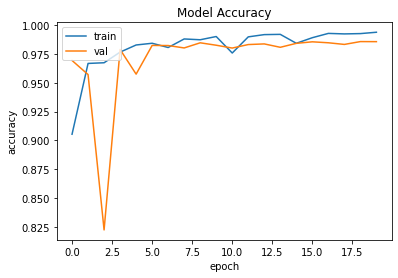

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

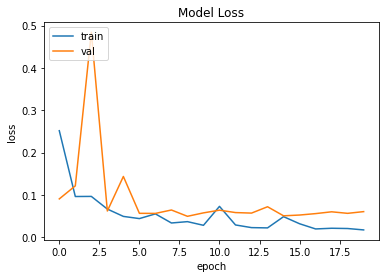

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Basic Testing

In [ ]:
# Test model

with tf.device('/device:GPU:1'):
    model.evaluate(X_test, y_test)

1514/1514 [==============================] - 8s 5ms/step - loss: 0.0627 - accuracy: 0.9855


In [ ]:
model

### Save Model

In [ ]:
file_prefix = "/content/gdrive/MyDrive/CS520/Centered_data/agent_10_nn_dense_"
timestamp = str(dt.datetime.now()).replace(' ', '_')
fname = file_prefix + timestamp

fname

'/content/gdrive/MyDrive/CS520/Centered_data/agent_10_nn_dense_2021-12-15_03:42:15.953232'

In [ ]:
model.save(fname)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/CS520/Centered_data/agent_10_nn_dense_2021-12-15_03:42:15.953232/assets
